<a href="https://colab.research.google.com/github/ashia-002/python-oop-pandas-numpy/blob/main/26_10_2025_ML_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

In [2]:
uploaded = files.upload()

Saving data.csv to data.csv


In [5]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df.head(5)

,feature1,feature2,target
0,-0.872929,0.013042,1
1,1.312935,2.770534,1
2,2.340428,2.420996,1
3,2.294548,-0.404380,1
4,0.944105,0.477241,1


In [6]:
x = df.drop(columns=['target'])

In [7]:
x.head(4)

,feature1,feature2
0,-0.872929,0.013042
1,1.312935,2.770534
2,2.340428,2.420996
3,2.294548,-0.404380


In [8]:
y = df['target']

In [9]:
y.head(5)

,target
0,1
1,1
2,1
3,1
4,1


In [17]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def logistic_regression(x, y, lr=0.1, epochs=500, plot=True):
  m, n = x.shape
  # Start with zero weights and bias
  w = np.zeros(n)
  b = 0.0

  cost_history = []

  for i in range(epochs):
    # Forward pass
    z = np.dot(x, w) + b
    y_pred = sigmoid(z)

    # Cost (Binary Cross-Entropy)
    cost = -(1/m) * np.sum(y * np.log(y_pred + 1e-10) + (1-y) * np.log(1 - y_pred + 1e-10))
    cost_history.append(cost)

    # Gradients
    dw = (1/m) * np.dot(x.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)

    # Update parameters
    w -= lr * dw
    b -+ lr * db

    # Optional logging
    if (i+1)%50 == 0:
      print(f"Epoch{i+1}: Cost = {cost: 4f}")

  if plot:
    plt.plot(cost_history)
    plt.title("Cost function over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.show()

  return w, b, cost_history


def predict(x, w, b, threshold=0.5):
  probs = sigmoid(np.dot(x, w) + b)
  return (probs >= threshold).astype(int)

Epoch50: Cost =  0.418261
Epoch100: Cost =  0.394598
Epoch150: Cost =  0.388660
Epoch200: Cost =  0.386667
Epoch250: Cost =  0.385907
Epoch300: Cost =  0.385595


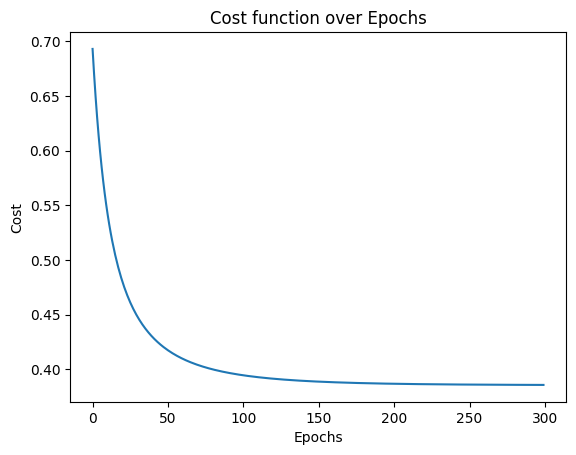


✅ Evaluation Results
Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.88      0.84      0.86        25

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50



In [16]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y
)

w, b, cost_hist = logistic_regression(x_train, y_train, lr=0.1, epochs=300, plot=True)

y_pred = predict(x_test, w, b)

print("\n✅ Evaluation Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))